In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [19]:
save_dir = './latex/'

In [3]:
lna_sim_file = "LAB DATA/simulated_LNA_noise_temp.txt"
lna_meas_file = "LAB DATA/Noise_LNA.csv"

In [12]:
simfreq, simTemp = np.loadtxt(lna_sim_file, skiprows=1, unpack=True)
measfreq, measTemp, measGain = np.loadtxt(lna_meas_file, skiprows=2, unpack=True)
measfreq /= 1e9

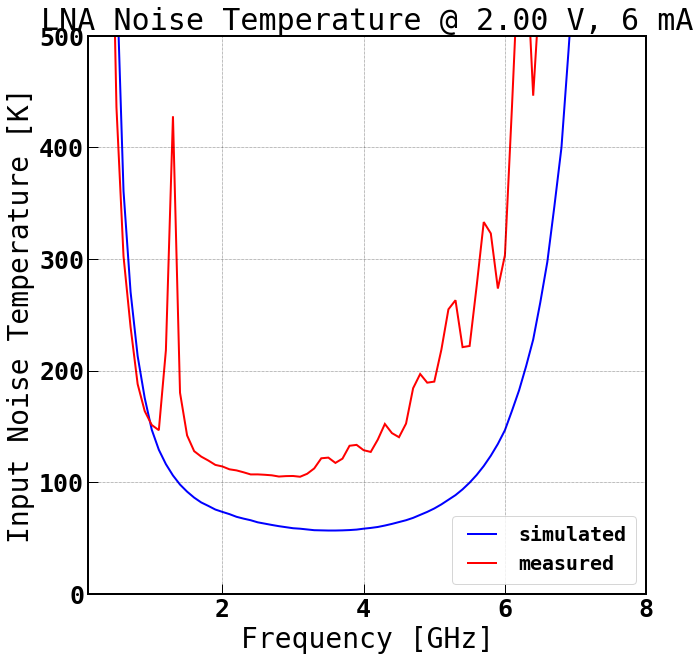

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(simfreq, simTemp, 'b', label='simulated')
ax.plot(measfreq, measTemp, 'r', label='measured')
ax.legend(loc='best')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Input Noise Temperature [K]')
ax.set_title(r'LNA Noise Temperature @ 2.00 V, 6 mA')
ax.set_ylim([0.0, 500.0])
ax.set_xlim([0.1, 8.0])
ax.grid(which='both')
# ax.axis('tight');
plt.savefig(save_dir + 'LNA_noisetemp_comparison.pdf')

In [24]:
filter_front_file = './LAB DATA/Noise_Front.csv'
filter_back_file = './LAB DATA/Noise_Back.csv'

In [28]:
ffreq, fTemp, fGain = np.loadtxt(filter_front_file, unpack=True, delimiter=',')
bfreq, bTemp, bGain = np.loadtxt(filter_back_file, unpack=True, delimiter=',')

ffreq /=1e9
bfreq /= 1e9

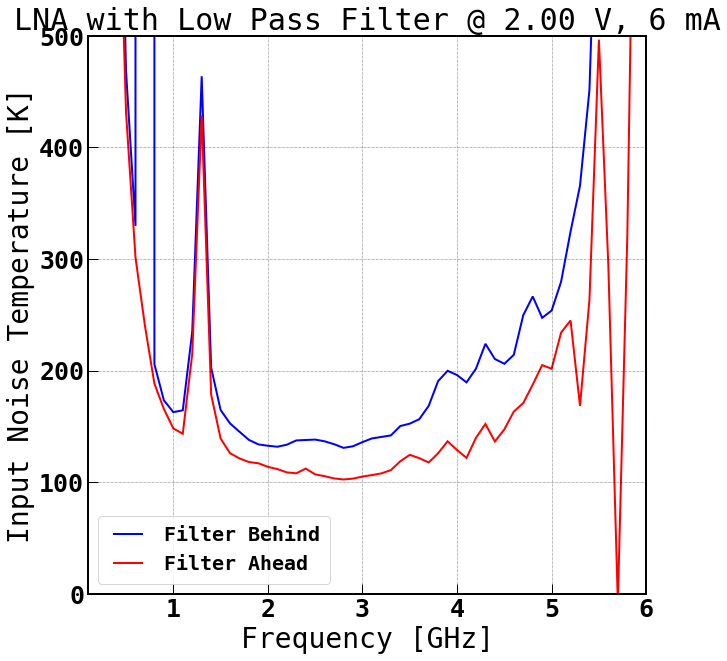

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ffreq, fTemp, 'b', label='Filter Behind')
ax.plot(bfreq, bTemp, 'r', label='Filter Ahead')
ax.legend(loc='best')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Input Noise Temperature [K]')
ax.set_title(r'LNA with Low Pass Filter @ 2.00 V, 6 mA')
ax.set_ylim([0.0, 500.0])
ax.set_xlim([0.1, 6.0])
ax.grid(which='both')
# ax.axis('tight');
plt.savefig(save_dir + 'Filter_noisetemp_comparison.pdf')

In [36]:
filter_file = "LAB DATA/filter_gain.txt"
filter_freq, filter_gain = np.loadtxt(filter_file, unpack=True, skiprows=1)

In [37]:
filter_gain = 10**(filter_gain/20) # converting from dB to unitless
filter_A = 1/filter_gain # attenuation of the filter

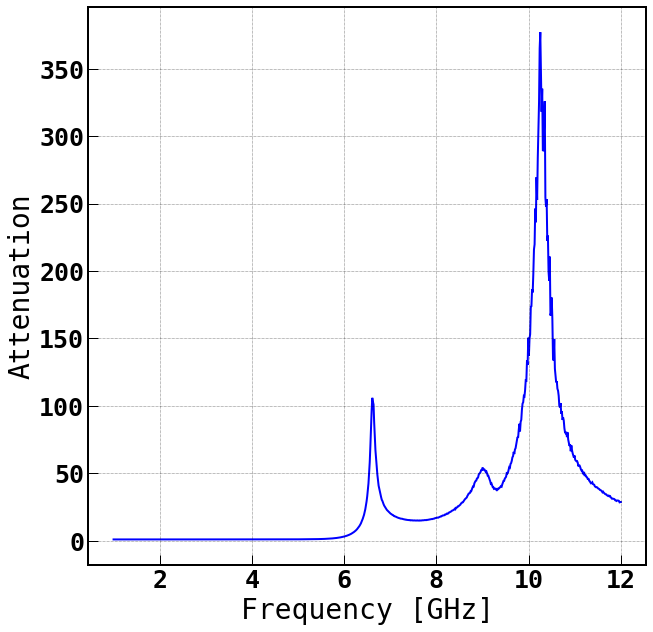

In [39]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(filter_freq, filter_A, 'b')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Attenuation')
# ax.set_ylim([0.0, 100.0])
ax.set_xlim([1, 5.0])
ax.grid(which='both')
ax.axis('tight');
plt.savefig(save_dir + 'Filter_attenuation.pdf')

In [42]:
amp_freq, amp_gain = np.loadtxt("LAB DATA/amplifier_gain.txt", unpack=True, skiprows=1)
amp_gain = 10**(amp_gain/20)

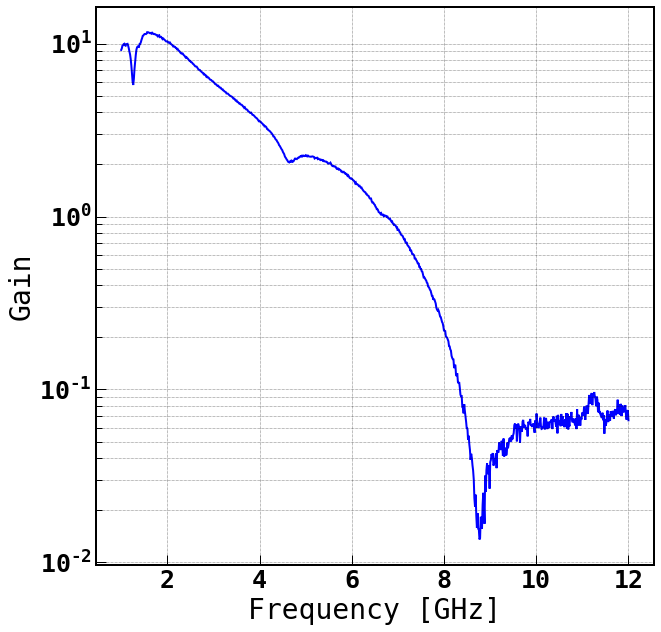

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
ax.semilogy(amp_freq, amp_gain, 'b')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Gain')
# ax.set_ylim([0.0, 100.0])
ax.set_xlim([1, 5.0])
ax.grid(which='both')
ax.axis('tight');
# plt.savefig(save_dir + 'Filter_attenuation.pdf')

In [69]:
T0 = 400
amp_Temp = np.interp(amp_freq, measfreq, measTemp)
Delta = (filter_A - 1) * (amp_Temp + T0 * (1 - 1/amp_gain))

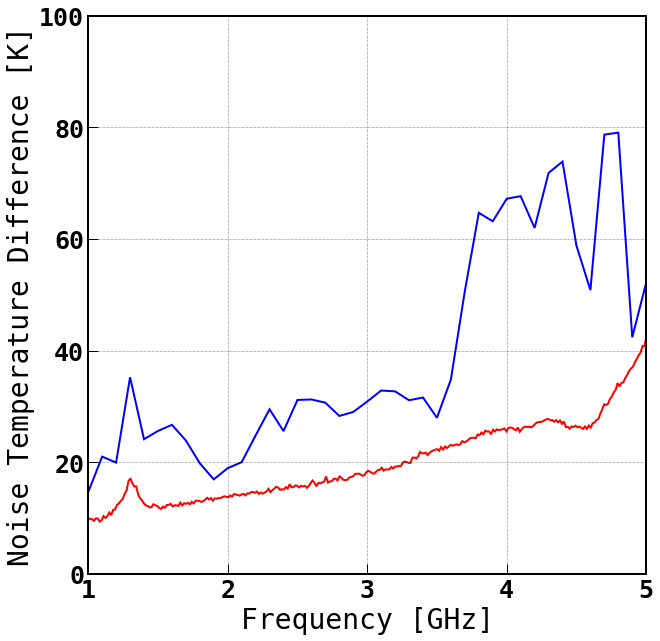

In [70]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ffreq, fTemp - bTemp, 'b')
ax.plot(amp_freq, Delta, 'r')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Noise Temperature Difference [K]')
# ax.set_title(r'LNA with Low Pass Filter @ 2.00 V, 6 mA')
ax.set_ylim([0.0, 100.0])
ax.set_xlim([1, 5.0])
ax.grid(which='both')
# ax.axis('tight');
plt.savefig(save_dir + 'Filter_noisetemp_comparison.pdf')

In [74]:
T_ahead = amp_Temp + (filter_A-1) * T0 / amp_gain

T_behind = (filter_A - 1)*T0 + filter_A * amp_Temp

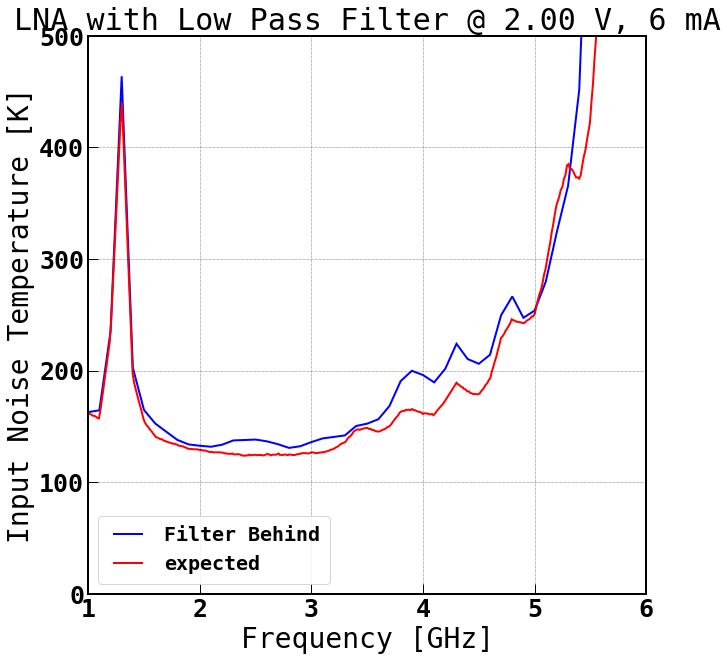

In [78]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ffreq, fTemp, 'b', label='Filter Behind')
ax.plot(amp_freq, T_behind, 'r', label='expected')
ax.legend(loc='best')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Input Noise Temperature [K]')
ax.set_title(r'LNA with Low Pass Filter @ 2.00 V, 6 mA')
ax.set_ylim([0.0, 500.0])
ax.set_xlim([1, 6.0])
ax.grid(which='both')
# ax.axis('tight');
# plt.savefig(save_dir + 'Filter_noisetemp_comparison.pdf')

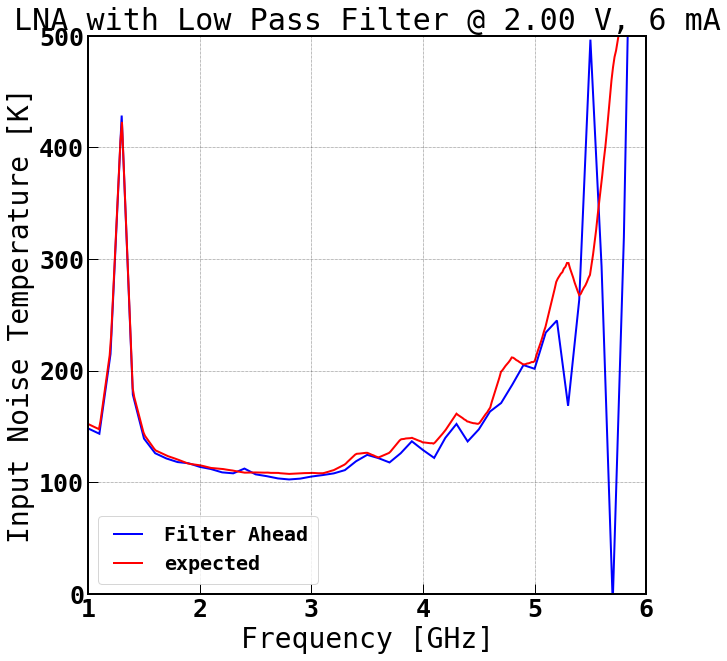

In [77]:
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(bfreq, bTemp, 'b', label='Filter Ahead')
ax.plot(amp_freq, T_ahead, 'r', label='expected')
ax.legend(loc='best')
ax.set_xlabel(r'Frequency [GHz]')
ax.set_ylabel(r'Input Noise Temperature [K]')
ax.set_title(r'LNA with Low Pass Filter @ 2.00 V, 6 mA')
ax.set_ylim([0.0, 500.0])
ax.set_xlim([1, 6.0])
ax.grid(which='both')
# ax.axis('tight');
# plt.savefig(save_dir + 'Filter_noisetemp_comparison.pdf')